## Задание:

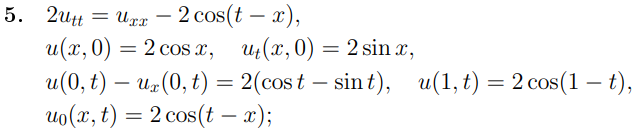


In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [77]:
tau = 0.01
h = 0.05
T = 1
N = int(T / tau)
I = int(1 / h)

a = 1/np.sqrt(2)

a0 = 1
al = 1

b0 = -1
bl = 0

#Сетка
omega_h = np.linspace(0, 1, I+1)
omega_tau = np.linspace(0, T, N+1)

u_teor = np.zeros((I+1, N+1))
u_i_n = np.zeros((I+1, N+1))

In [78]:
def phi_1_x(x): 
    return 2*np.cos(x)

def psi_x(x): 
    return 2*np.sin(x)

def gamma_0(t): 
    return 2*(np.cos(t) - np.sin(t))

def gamma_l(t): 
    return 2*np.cos(1-t)

def u_teoretical(x,t): 
    return 2*np.cos(t-x)

def f(x,t): 
    return (-1)*np.cos(t-x)

In [79]:
# Апроксимация начальных условий
for i in range(I+1):
    u_i_n[i][0] =  phi_1_x(omega_h[i])
    
# Апроксимация начальных условий (второй порядок)
for i in range(1, I):
    u_i_n[i][1] = (1/2) * (2*(1-((tau*a)/h)**2)*u_i_n[i][0] + (u_i_n[i+1][0] + u_i_n[i-1][0])*((tau*a)/h)**2 + f(omega_h[i], omega_tau[0])*(tau**2) + psi_x(omega_h[i])*2*tau)
    
# Апроксимация граничных условий

# Первый порядок
def first(n):
        u_i_n[I][n+1] = (1/(bl+al*h))*(gamma_l(omega_tau[n+1]) * h + bl * u_i_n[I-1][n+1])
        u_i_n[0][n+1] = (1/(a0-b0/h))*(gamma_0(omega_tau[n+1]) - u_i_n[1][n+1]*(b0/h))
        
#Второй порядок        
def second(n):
        u_i_n[I][n+1] = (gamma_l(omega_tau[n+1]) - (bl/(2*h))*(u_i_n[I-2][n+1] - 4*u_i_n[I-1][n+1]))/(al+(3*bl)/(2*h))
        u_i_n[0][n+1] = (gamma_0(omega_tau[n+1]) - (b0/(2*h))*(-u_i_n[2][n+1] + 4*u_i_n[1][n+1]))/(a0-(3*b0)/(2*h))
        

In [80]:
u_i_n[0][1] = (gamma_0(omega_tau[1]) - (b0/(2*h))*(4*u_i_n[1][1] - u_i_n[2][1]))/(a0-(3*b0)/(2*h))
u_i_n[I][1] = (gamma_l(omega_tau[1]) - (bl/(2*h))*(u_i_n[I-2][1] - 4*u_i_n[I-1][1]))/(al+(3*bl)/(2*h))

for n in range(2, N+1):
    for i in range(1, I):
        u_i_n[i][n] = 2*u_i_n[i][n-1] - u_i_n[i][n-2] + (u_i_n[i+1][n-1] - 2*u_i_n[i][n-1] + u_i_n[i-1][n-1])*((tau*a)/h)**2 + tau*tau*f(omega_h[i], omega_tau[n-1]) 
    second(n-1)

In [81]:
x,y = np.meshgrid(omega_h, omega_tau)
z = u_i_n
for i in range(I+1):
    for n in range(N+1):
        u_teor[i][n] = u_teoretical(omega_h[i], omega_tau[n])

In [82]:
#fig = plt.figure()
#ax = fig.add_subplot(projection="3d")

#ax.plot_surface(x, y, u_teor, cmap="inferno")

#ax.set(xlabel="$x$", ylabel="$t$", zlabel="$u$");


In [83]:
#fig = plt.figure()
#ax = fig.add_subplot(projection="3d")

#ax.plot_surface(x, y, z)

#ax.set(xlabel="$x$", ylabel="$t$", zlabel="$u$");

In [84]:
#для второого
a = []
for i in range(I+1):
    a.append(abs(u_i_n[i][N] - u_teor[i][N]))
print(max(a))

0.00048455585499551646


In [75]:
#для первого
b = []
for i in range(I+1):
    b.append(abs(u_i_n[i][N] - u_teor[i][N]))
print(max(b))

0.020314189295813856
